In [1]:
# 설치 확인
import sklearn

sklearn.__version__

'1.2.2'

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris['data']

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris['target']
print('iris target 값 :', iris_label)
print('iris target 명 :', iris['target_names'])

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data = iris_data, columns = iris['feature_names'])
iris_df['label'] = iris['target']
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_data,
                                                   iris_label,
                                                   test_size = 0.2,
                                                   random_state = 11)

In [8]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

X_train : (120, 4), y_train : (120,)
X_test : (30, 4), y_test : (30,)


In [10]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [11]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


In [14]:
print(f'실제 정답 : {y_test}')
print(f'컴터 정답 : {pred}')

실제 정답 : [2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
컴터 정답 : [2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [16]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [17]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들 :', keys)

붓꽃 데이터 세트의 키들 : dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [20]:
print('\n feature_names의 type :', type(iris_data.feature_names))
print('feature_names의 shape :', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type :', type(iris_data.target_names))
print('target_names의 shape :', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type :', type(iris_data.data))
print('data의 shape :', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type :', type(iris_data.target))
print('target의 shape :', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type : <class 'list'>
feature_names의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type : <class 'numpy.ndarray'>
target_names의 shape : 3
['setosa' 'versicolor' 'virginica']

 data의 type : <class 'numpy.ndarray'>
data의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]


In [21]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도 :', accuracy_score(train_label, pred))

예측 정확도 : 1.0


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size = 0.3,
                                                   random_state = 121)

In [26]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


In [28]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits = 5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기 :', features.shape[0])

붓꽃 데이터 세트 크기 : 150


In [30]:
n_iter = 0

# KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features) :
    # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 데스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 검증 세트 인덱스 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도 :', np.mean(cv_accuracy))


#1 검증 세트 인덱스 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 검증 세트 인덱스 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 검증 세트 인덱스 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 검증 세트 인덱스 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 검증 세트 인덱스 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도 : 0.9


In [32]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [34]:
kfold = KFold(n_splits = 3)
#kfold.split(X)는 폴드 세트를 3번 반복할 때마다
# 달라지는 학습 / 데이터 용 데이터 로우 인덱스 번호 반환
n_iter = 0
for train_index, test_index in kfold.split(iris_df) :
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    50
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 :
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    50
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 2    50
Name: label, dtype: int64


In [36]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0
for train_index, test_index in skf.split(iris_df, iris_df['label']) :
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증 : {0}'.format(n_iter))
    print('학습 레이블 데이터 분포 :\n', label_train.value_counts())
    print('검증 레이블 데이터 분포 :\n', label_test.value_counts())

## 교차 검증 : 1
학습 레이블 데이터 분포 :
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포 :
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포 :
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
 1    17
2    17
0    16
Name: label, dtype: int64


In [41]:
from sklearn.model_selection import StratifiedKFold

dt_clf = DecisionTreeClassifier(random_state = 156)
skfold = StratifiedKFold(n_splits = 5)
n_iter = 0
cv_accuracy = []

# KFold 객체의 split() 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in skfold.split(features, label) :
    # kfold.split()으로 반환된 인덱스를 이용하여 학습용, 검증용 데스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 검증 세트 인덱스 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도 :', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 :', np.round(np.mean(cv_accuracy), 4))


#1 검증 세트 인덱스 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]

#2 검증 세트 인덱스 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [ 10  11  12  13  14  15  16  17  18  19  60  61  62  63  64  65  66  67
  68  69 110 111 112 113 114 115 116 117 118 119]

#3 검증 세트 인덱스 : 0.9, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [ 20  21  22  23  24  25  26  27  28  29  70  71  72  73  74  75  76  77
  78  79 120 121 122 123 124 125 126 127 128 129]

#4 검증 세트 인덱스 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 30  31  32  33  34  35  36  37  38  39  80  81  82  83  84  85  86  87
  88  89 130 131 132 133 134 135 136 137 138 139]

#5 검증 세트 인덱스 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [ 40  41  42  43  44  45  46  47  48  49  90  91  92  93  94  95  96  97
  98  99 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도 : [0.9667 0.9667 0.9 

In [42]:
from sklearn.model_selection import cross_val_score, cross_validate

iris_data = load_iris()
df_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도 :', np.round(scores, 4))
print('평균 검증 정확도 :', np.round(np.mean(scores), 4))

교차 검증별 정확도 : [0.98 0.94 0.98]
평균 검증 정확도 : 0.9667


In [50]:
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데어터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size = 0.2,
                                                   random_state = 121)
dtree = DecisionTreeClassifier()

### parameter들을 dictionary 형태로 설정
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

In [51]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold로 나누어서 테스트 수행 결정.
# refit = True가 default임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습 / 평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score',
          'rank_test_score', 'split0_test_score',
          'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [52]:
print('GridSearchCV 최적 파라미터: ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0: .4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터:  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:  0.9750


In [53]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9667


In [54]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :', labels)

인코딩 변환값 : [0 1 4 5 3 3 2 2]


In [55]:
print('인코딩 클래스 :', encoder.classes_)

인코딩 클래스 : ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [56]:
print('디코딩 원본값 :', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값 : ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [58]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [59]:
labels.shape

(8,)

In [60]:
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [61]:
# 2차원 ndarray로 변환합니다.
items = np.array(items).reshape(-1, 1)

In [66]:
# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


# <참고>
- 특성이 범주형일 때 무조건 원-핫 인코딩
- 특성이 숫자 자료형일 때 무조건 스케일링
- 타겟이 범주형이고 자연어일 때(분류 문제) 무조건 라벨 인코더
- 타겟이 숫자 자료형(회귀)일 때는 건드리지 않기

In [68]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris  = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('features들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

features들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [73]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 변환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('features들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

features들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [74]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 변환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('features들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

features들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [102]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [104]:
scaler = MinMaxScaler()

scaler.fit(test_array)

test_scaled = scaler.transform(test_array)

print(f'원본 test_array 데이터 : {np.round(test_array.reshape(-1),2)}')
print(f'scale된 test_array 데이터 : {np.round(test_scaled.reshape(-1),2)}')

원본 test_array 데이터 : [0 1 2 3 4 5]
scale된 test_array 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


In [106]:
scaler = MinMaxScaler()

scaler.fit(train_array)

train_scaled = scaler.transform(train_array)

print(f'원본 train_array 데이터 : {np.round(train_array.reshape(-1),2)}')
print(f'scale된 train_array 데이터 : {np.round(train_scaled.reshape(-1),2)}')

원본 train_array 데이터 : [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [107]:
# scaler.fit()을 test_array로 적용하지 않고, scaler.fit(train_array)를 동일하게 사용.
test_scaled = scaler.transform(test_array)

print(f'원본 test_array 데이터 : {np.round(test_array.reshape(-1),2)}')
print(f'scale된 test_array 데이터 : {np.round(test_scaled.reshape(-1),2)}')

원본 test_array 데이터 : [0 1 2 3 4 5]
scale된 test_array 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("D:/sample_data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print('\n ### train 데이터 정보 ### \n')
print(titanic_df.info())


 ### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
print("데이터 세트 Null 값 갯수 \n", titanic_df.isnull().sum())

데이터 세트 Null 값 갯수 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
print("데이터 세트 Null 값 갯수 \n", titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수 
 866


In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print("데이터 세트 Null 값 갯수 \n", titanic_df.isnull().sum())

데이터 세트 Null 값 갯수 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [6]:
print(" Sex 값 분포 :\n", titanic_df['Sex'].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df['Cabin'].value_counts())
print(" \n Embarked 값 분포 :\n", titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
 
 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [7]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))
print("\n Cabin 값 분포 :\n", titanic_df['Cabin'].value_counts())

0    N
1    C
2    N
Name: Cabin, dtype: object

 Cabin 값 분포 :
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [8]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

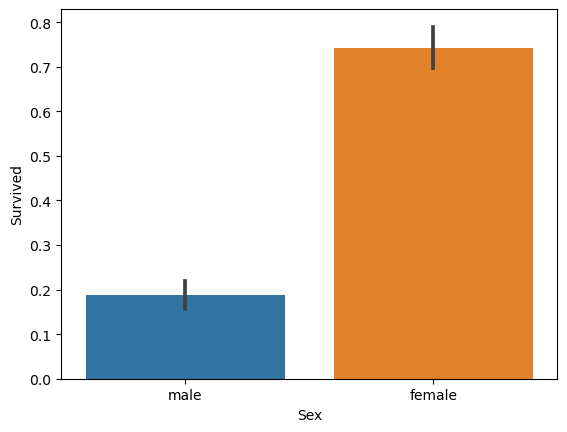

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

In [10]:
sns.barplot(x = 'Pcalss', y = 'Survived', hue = 'Sex', inplace = True)

ValueError: Could not interpret input 'Pcalss'

In [12]:
print(titanic_df['Age'].min())
print(titanic_df['Age'].max())

0.42
80.0


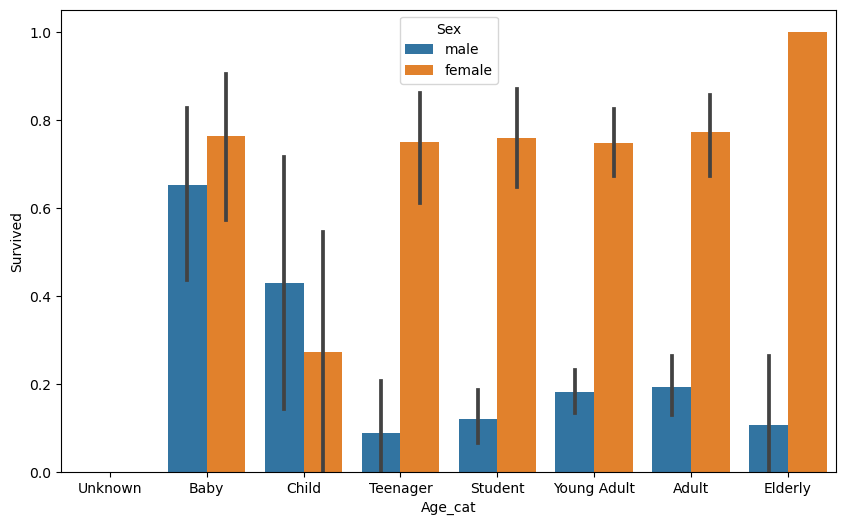

In [15]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager'
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else :
        cat = 'Elderly'

    return cat

plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order= group_names)
titanic_df.drop('Age_cat', axis = 1, inplace=True)
        

In [18]:
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [25]:
from sklearn import preprocessing
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)       
    df['Fare'].fillna(0, inplace = True)       
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df

def format_features(df) :
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df) :
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [30]:
titanic_df = pd.read_csv("D:/sample_data/titanic_train.csv")
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis = 1)

x_titanic_df = transform_features(x_titanic_df)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [31]:
x_titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
y_titanic_df.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state =11)
print(f'X_train의 크기 : {X_train.shape}, y_train 크기 : {y_train.shape}')
print(f'X_test의 크기 : {X_test.shape}, y_test 크기 : {y_test.shape}')

X_train의 크기 : (712, 8), y_train 크기 : (712,)
X_test의 크기 : (179, 8), y_test 크기 : (179,)


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
dt_clf = DecisionTreeClassifier(random_state =11)
rf_clf = RandomForestClassifier(random_state =11)
lr_clf = LogisticRegression(max_iter = 1000)

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(' DecisionTreeClassifier 정확도:{0:.4f}.'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(' RandomForestClassifier 정확도:{0:.4f}.'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(' LogisticRegression 정확도:{0:.4f}.'.format(accuracy_score(y_test, lr_pred)))

 DecisionTreeClassifier 정확도:0.7877.
 RandomForestClassifier 정확도:0.8547.
 LogisticRegression 정확도:0.8492.


In [47]:
from sklearn.model_selection import KFold
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test= x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test= y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도:{1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
    
exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도: 0.7823


In [49]:
dt_clf = DecisionTreeClassifier(random_state=11)

exec_kfold(df_clf, folds =5)

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도: 0.7823


In [53]:
from sklearn.model_selection import cross_val_score
dt_clf = DecisionTreeClassifier(random_state=11)
scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도:{1:.4f}".format(iter_count, accuracy))
    
    print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도:0.7430
평균 정확도: 0.7879
교차 검증 1 정확도:0.7753
평균 정확도: 0.7879
교차 검증 2 정확도:0.7921
평균 정확도: 0.7879
교차 검증 3 정확도:0.7865
평균 정확도: 0.7879
교차 검증 4 정확도:0.8427
평균 정확도: 0.7879


In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}', format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: {0:.4f} 0.7991825076332119
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
